In [1]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import vectorbt as vbt
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestRegressor, 
                              RandomForestClassifier)
from sklearn.metrics import (mean_squared_error, 
                             r2_score, 
                             mean_absolute_error,
                             mean_absolute_percentage_error, 
                             plot_confusion_matrix, 
                             accuracy_score, 
                             precision_score, 
                             recall_score, 
                             f1_score)
from sklearn.model_selection import (GridSearchCV, 
                                     TimeSeriesSplit)

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
start_date = datetime(2015,1,1)
end_date = datetime(2020,12,31)

In [6]:
data = pd.DataFrame()
data = data.ta.ticker('BTC-USD',start = start_date, end = end_date)

In [7]:
df = data.copy()

In [8]:
df = df[['Close']]
df.tail()

,Close
Date,
2020-12-26 00:00:00+00:00,26437.037109
2020-12-27 00:00:00+00:00,26272.294922
2020-12-28 00:00:00+00:00,27084.808594
2020-12-29 00:00:00+00:00,27362.437500
2020-12-30 00:00:00+00:00,28840.953125


In [9]:
_1M = 21

In [10]:
for i in [1,3,6]:
    col_name = 'Return_%dM_fwd'%i
    df[col_name] = df['Close'].pct_change(i*_1M).shift()
df.tail()

,Close,Return_1M_fwd,Return_3M_fwd,Return_6M_fwd
Date,,,,
2020-12-26 00:00:00+00:00,26437.037109,0.318989,0.907336,1.127653
2020-12-27 00:00:00+00:00,26272.294922,0.380219,1.016853,1.263091
2020-12-28 00:00:00+00:00,27084.808594,0.358084,1.016111,1.252262
2020-12-29 00:00:00+00:00,27362.437500,0.411282,1.071457,1.300275
2020-12-30 00:00:00+00:00,28840.953125,0.493490,1.003955,1.407365


In [11]:
# append ema 
for i in [5,12,26]:
    df.ta.ema(i,append=True)
df.tail()

,Close,Return_1M_fwd,Return_3M_fwd,Return_6M_fwd,EMA_5,EMA_12,EMA_26
Date,,,,,,,
2020-12-26 00:00:00+00:00,26437.037109,0.318989,0.907336,1.127653,24667.373065,23257.167113,21451.689971
2020-12-27 00:00:00+00:00,26272.294922,0.380219,1.016853,1.263091,25202.347018,23721.032930,21808.771819
2020-12-28 00:00:00+00:00,27084.808594,0.358084,1.016111,1.252262,25829.834210,24238.536878,22199.589358
2020-12-29 00:00:00+00:00,27362.437500,0.411282,1.071457,1.300275,26340.701973,24719.136974,22582.022554
2020-12-30 00:00:00+00:00,28840.953125,0.493490,1.003955,1.407365,27174.119024,25353.262535,23045.647040


In [12]:
df['Close-EMA_5'] = df['Close'] - df['EMA_5']
df['EMA_5-EMA_12'] = df['EMA_5'] - df['EMA_12']
df['EMA_12-EMA_26'] = df['EMA_12'] - df['EMA_26']
df.tail()

,Close,Return_1M_fwd,Return_3M_fwd,Return_6M_fwd,EMA_5,EMA_12,EMA_26,Close-EMA_5,EMA_5-EMA_12,EMA_12-EMA_26
Date,,,,,,,,,,
2020-12-26 00:00:00+00:00,26437.037109,0.318989,0.907336,1.127653,24667.373065,23257.167113,21451.689971,1769.664044,1410.205952,1805.477142
2020-12-27 00:00:00+00:00,26272.294922,0.380219,1.016853,1.263091,25202.347018,23721.032930,21808.771819,1069.947904,1481.314088,1912.261111
2020-12-28 00:00:00+00:00,27084.808594,0.358084,1.016111,1.252262,25829.834210,24238.536878,22199.589358,1254.974384,1591.297332,2038.947520
2020-12-29 00:00:00+00:00,27362.437500,0.411282,1.071457,1.300275,26340.701973,24719.136974,22582.022554,1021.735527,1621.564999,2137.114420
2020-12-30 00:00:00+00:00,28840.953125,0.493490,1.003955,1.407365,27174.119024,25353.262535,23045.647040,1666.834101,1820.856488,2307.615495


In [13]:
df.dropna(inplace=True)
df

,Close,Return_1M_fwd,Return_3M_fwd,Return_6M_fwd,EMA_5,EMA_12,EMA_26,Close-EMA_5,EMA_5-EMA_12,EMA_12-EMA_26
Date,,,,,,,,,,
2015-05-08 00:00:00+00:00,243.863007,0.038329,-0.140648,-0.244758,238.046364,235.263827,235.239362,5.816643,2.782537,0.024465
2015-05-09 00:00:00+00:00,241.832001,0.094135,-0.105822,-0.225910,239.308243,236.274315,235.727706,2.523758,3.033928,0.546609
2015-05-10 00:00:00+00:00,240.296005,0.082720,-0.124625,-0.139639,239.637497,236.893037,236.066098,0.658508,2.744460,0.826938
2015-05-11 00:00:00+00:00,242.158005,0.079497,-0.124139,-0.090460,240.477666,237.703032,236.517351,1.680339,2.774634,1.185681
2015-05-12 00:00:00+00:00,241.112000,0.078050,-0.163839,-0.117738,240.689111,238.227488,236.857695,0.422889,2.461622,1.369793
...,...,...,...,...,...,...,...,...,...,...
2020-12-26 00:00:00+00:00,26437.037109,0.318989,0.907336,1.127653,24667.373065,23257.167113,21451.689971,1769.664044,1410.205952,1805.477142
2020-12-27 00:00:00+00:00,26272.294922,0.380219,1.016853,1.263091,25202.347018,23721.032930,21808.771819,1069.947904,1481.314088,1912.261111
2020-12-28 00:00:00+00:00,27084.808594,0.358084,1.016111,1.252262,25829.834210,24238.536878,22199.589358,1254.974384,1591.297332,2038.947520


# Regression Section

In [14]:
my_features = ['Return_3M_fwd', 'Return_6M_fwd', 'Close-EMA_5', 'EMA_5-EMA_12', 'EMA_12-EMA_26']
X = df[my_features]
y = df['Return_1M_fwd']

In [15]:
# Note shuffle must be false
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

In [16]:
regr = RandomForestRegressor(random_state=42)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

max_depth:  27


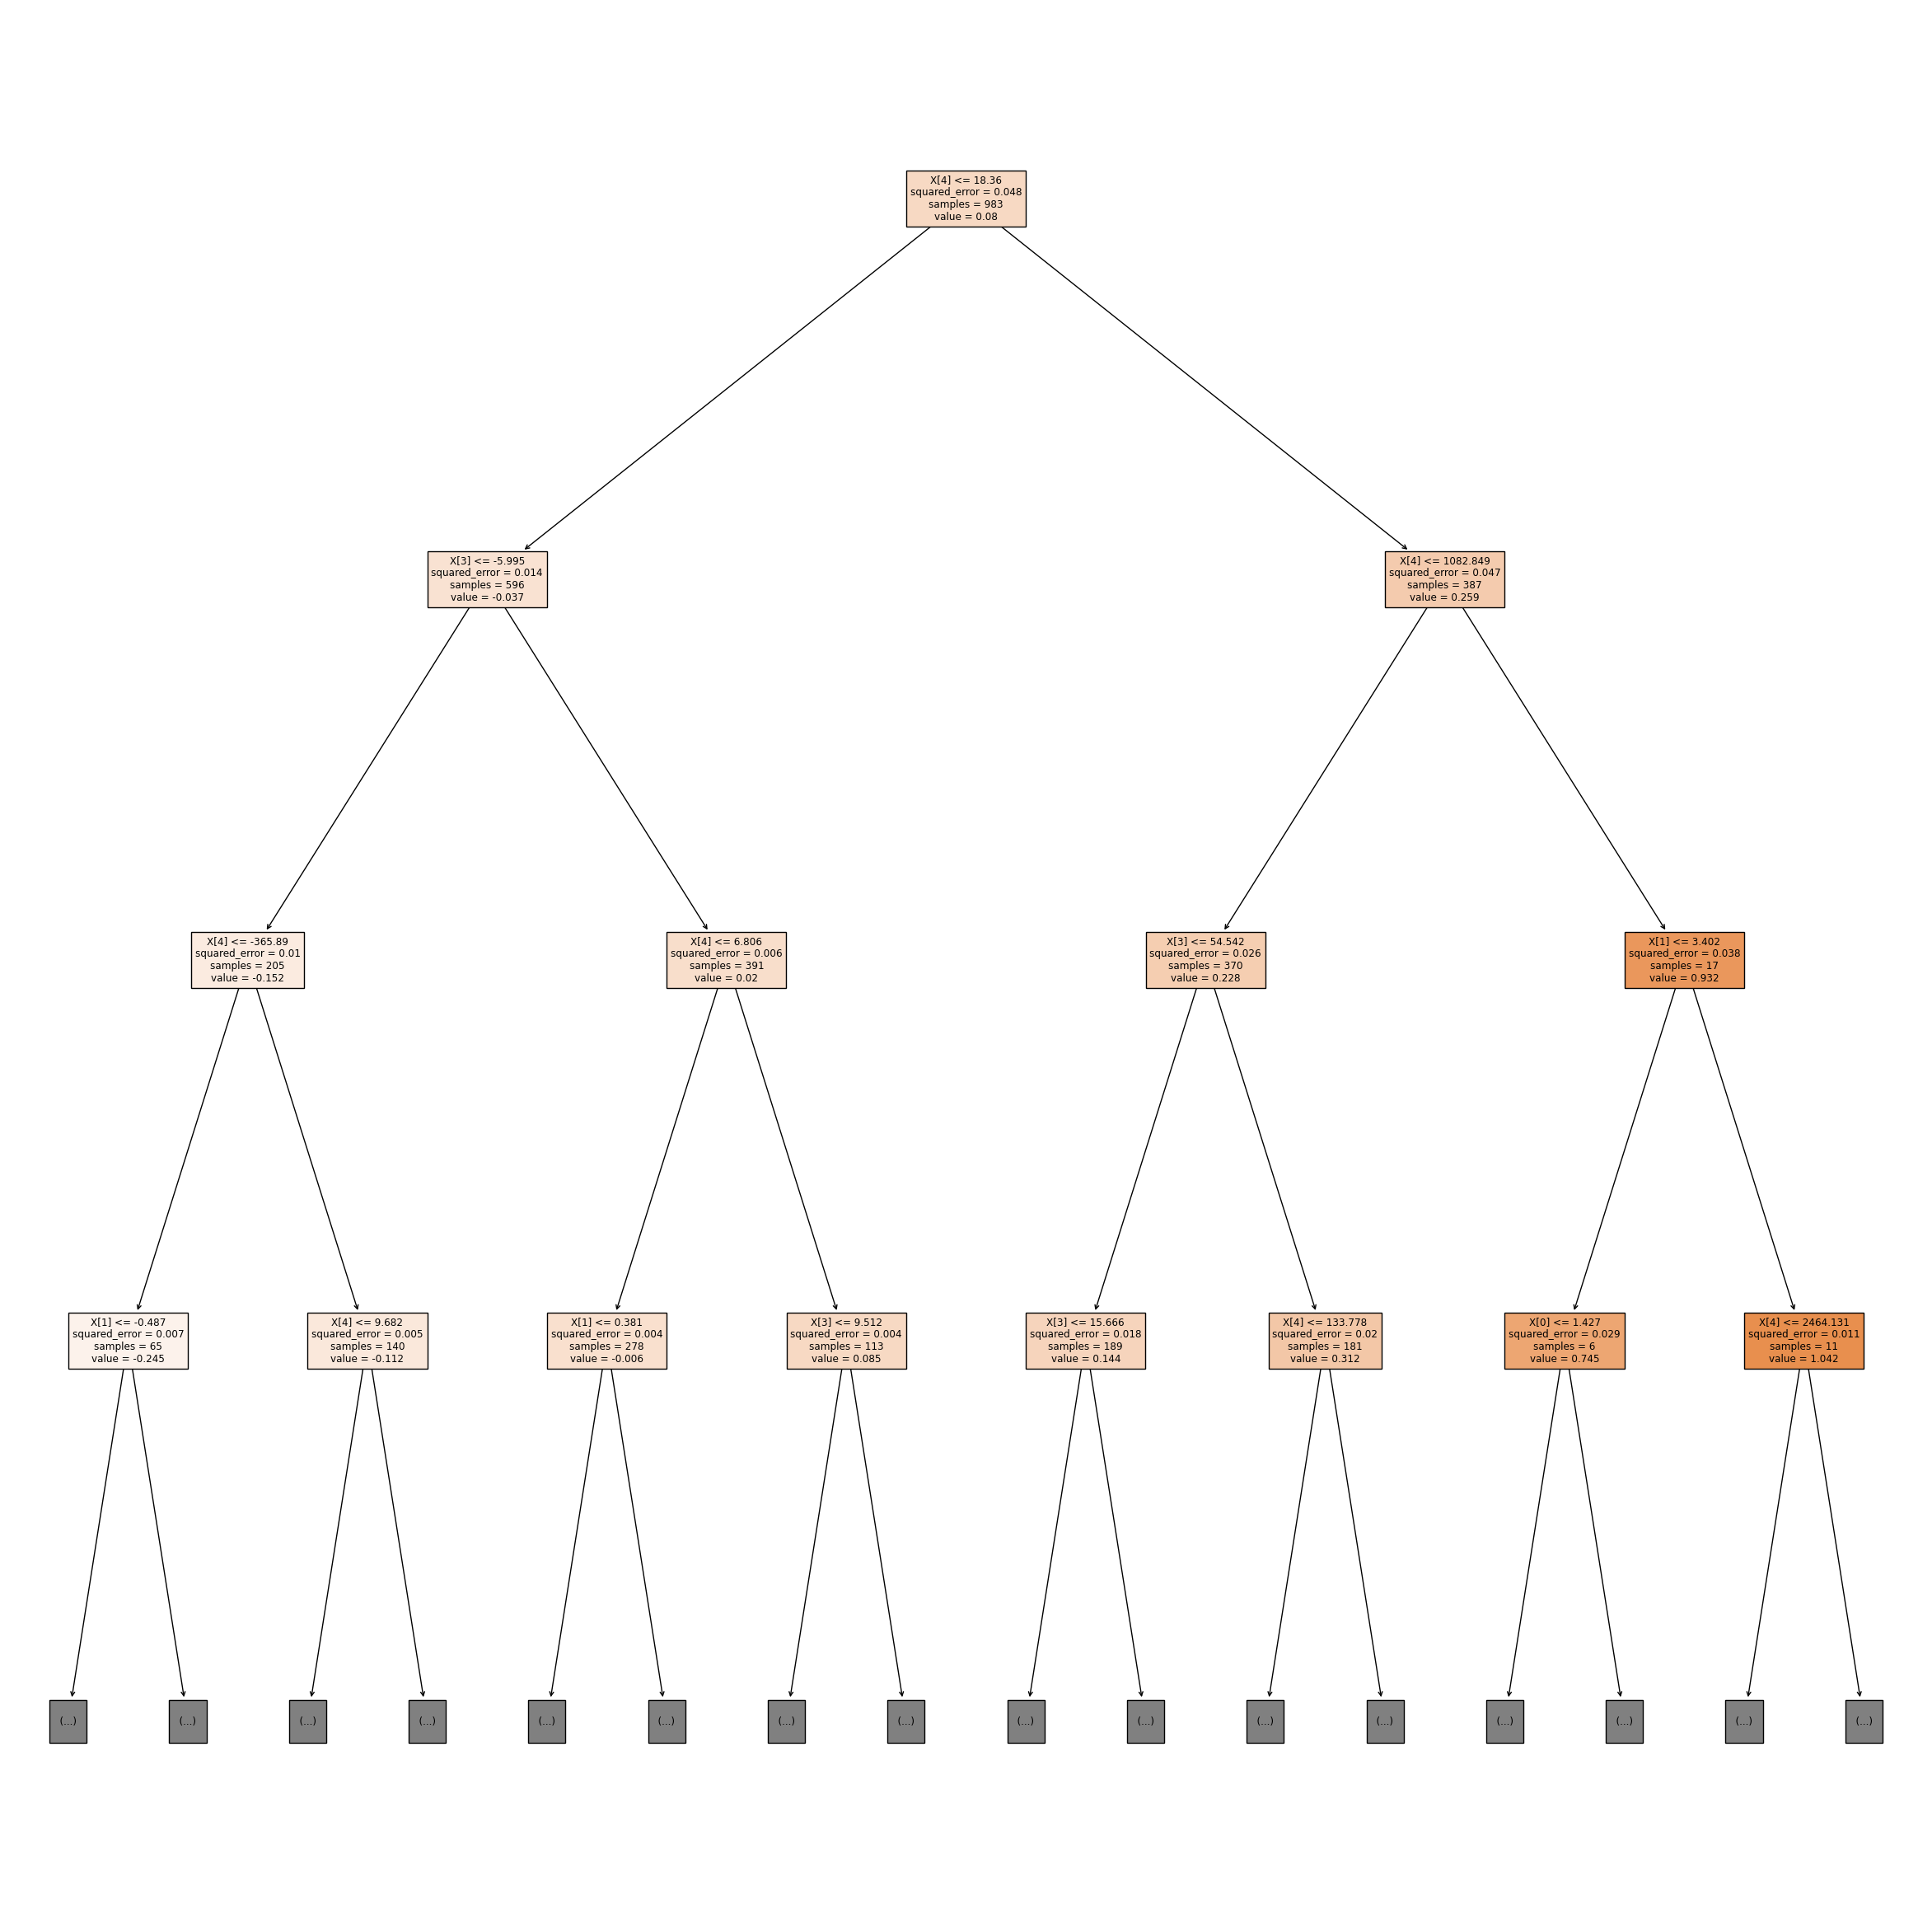

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,30))
print("max_depth: ",regr.estimators_[1].tree_.max_depth)
plot_tree(regr.estimators_[1], filled=True, max_depth=3);

In [18]:
train_mse = mean_squared_error(y_train, regr.predict(X_train))
test_mse = mean_squared_error(y_test, y_pred)

print(f"training mse: {train_mse:.4f}")
print(f"testing mse: {test_mse:.4f}")

training mse: 0.0007
testing mse: 0.0144


In [19]:
train_r2 = r2_score(y_train, regr.predict(X_train))
test_r2 = r2_score(y_test, y_pred)

print(f"training r-square: {train_r2:.4f}")
print(f"testing r-square: {test_r2:.4f}")

training r-square: 0.9842
testing r-square: 0.4797


In [20]:
train_mae = mean_absolute_error(y_train, regr.predict(X_train))
test_mae = mean_absolute_error(y_test, y_pred)

print(f"training mse: {train_mae:.4f}")
print(f"testing mse: {test_mae:.4f}")

training mse: 0.0182
testing mse: 0.0901


In [21]:
train_mape = mean_absolute_percentage_error(y_train, regr.predict(X_train))
test_mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"training mse: {train_mape:.4f}")
print(f"testing mse: {test_mape:.4f}")

training mse: 0.8341
testing mse: 3.0169


In [22]:

rf_params = {
            'n_estimators': [100, 200, 300, 400, 500],  
            'max_depth': np.arange(4, 25, 1),   
            'min_samples_leaf': [10,100],  
            'bootstrap': [True, False], 
            'max_features': [1, 2, 3, 4]
}


tscv = TimeSeriesSplit(n_splits = 5)
rf_regr = GridSearchCV(RandomForestRegressor(random_state=0), rf_params, cv=tscv, n_jobs=-1)
grid_result = rf_regr.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.6475258446535909
Best Params:  {'bootstrap': True, 'max_depth': 4, 'max_features': 2, 'min_samples_leaf': 10, 'n_estimators': 500}


Text(0.5, 0, 'feature importance')

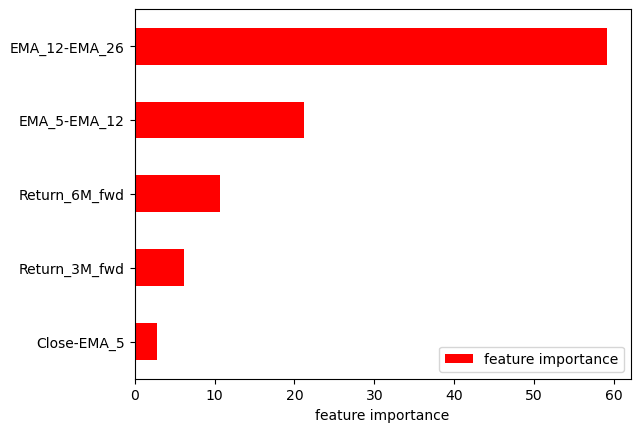

In [23]:
Importance = pd.DataFrame({'feature importance':regr.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('feature importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('feature importance')

In [24]:
df.head()

,Close,Return_1M_fwd,Return_3M_fwd,Return_6M_fwd,EMA_5,EMA_12,EMA_26,Close-EMA_5,EMA_5-EMA_12,EMA_12-EMA_26
Date,,,,,,,,,,
2015-05-08 00:00:00+00:00,243.863007,0.038329,-0.140648,-0.244758,238.046364,235.263827,235.239362,5.816643,2.782537,0.024465
2015-05-09 00:00:00+00:00,241.832001,0.094135,-0.105822,-0.225910,239.308243,236.274315,235.727706,2.523758,3.033928,0.546609
2015-05-10 00:00:00+00:00,240.296005,0.082720,-0.124625,-0.139639,239.637497,236.893037,236.066098,0.658508,2.744460,0.826938
2015-05-11 00:00:00+00:00,242.158005,0.079497,-0.124139,-0.090460,240.477666,237.703032,236.517351,1.680339,2.774634,1.185681
2015-05-12 00:00:00+00:00,241.112000,0.078050,-0.163839,-0.117738,240.689111,238.227488,236.857695,0.422889,2.461622,1.369793


In [25]:
df['Return_1M_fwd'] = np.where(df['Return_1M_fwd']>0, 'Profit', 'Loss')
df.head()

,Close,Return_1M_fwd,Return_3M_fwd,Return_6M_fwd,EMA_5,EMA_12,EMA_26,Close-EMA_5,EMA_5-EMA_12,EMA_12-EMA_26
Date,,,,,,,,,,
2015-05-08 00:00:00+00:00,243.863007,Profit,-0.140648,-0.244758,238.046364,235.263827,235.239362,5.816643,2.782537,0.024465
2015-05-09 00:00:00+00:00,241.832001,Profit,-0.105822,-0.225910,239.308243,236.274315,235.727706,2.523758,3.033928,0.546609
2015-05-10 00:00:00+00:00,240.296005,Profit,-0.124625,-0.139639,239.637497,236.893037,236.066098,0.658508,2.744460,0.826938
2015-05-11 00:00:00+00:00,242.158005,Profit,-0.124139,-0.090460,240.477666,237.703032,236.517351,1.680339,2.774634,1.185681
2015-05-12 00:00:00+00:00,241.112000,Profit,-0.163839,-0.117738,240.689111,238.227488,236.857695,0.422889,2.461622,1.369793


In [26]:
my_features = ['Return_3M_fwd', 'Return_6M_fwd', 'Close-EMA_5', 'EMA_5-EMA_12', 'EMA_12-EMA_26']
X = df[my_features]
y = df['Return_1M_fwd']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42 ,shuffle=False)

In [28]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

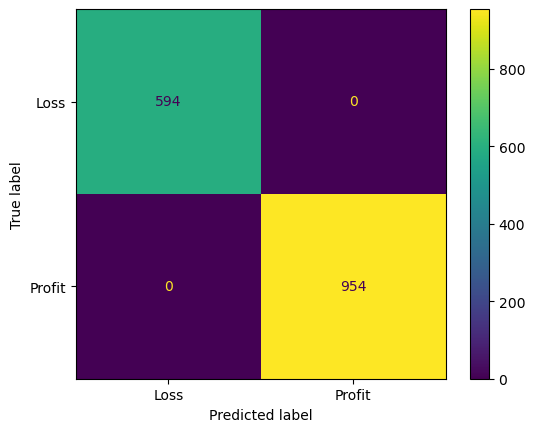

In [29]:
plot_confusion_matrix(clf, X_train, y_train)

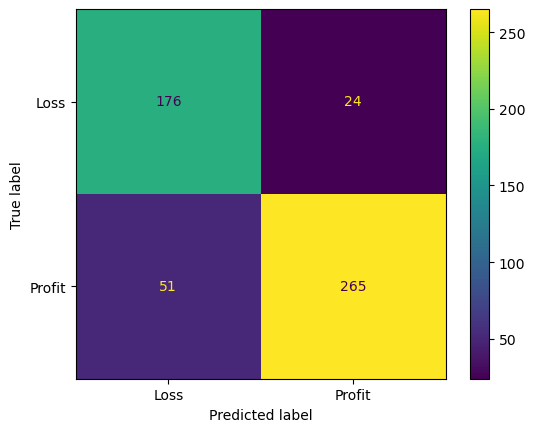

In [30]:
plot_confusion_matrix(clf, X_test, y_test)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [32]:
accuracy_score(y_pred, y_test) 

0.8546511627906976

# focus on loss

In [33]:
precision_score(y_test, y_pred, pos_label='Loss') 

0.775330396475771

In [34]:
recall_score(y_test, y_pred, pos_label='Loss') 

0.88

In [35]:
f1_score(y_test, y_pred, pos_label='Loss')

0.8243559718969555

# focus on profit

In [36]:
precision_score(y_test, y_pred, pos_label='Profit')# 266/(266+26)

0.916955017301038

In [37]:
recall_score(y_test, y_pred, pos_label='Profit') # 266/(266+50)

0.8386075949367089

In [38]:
f1_score(y_test, y_pred, pos_label='Profit')


0.8760330578512395